# 预处理

In [147]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [164]:
%matplotlib inline

In [165]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## 预处理

In [175]:
df = pd.read_csv('data/houses.csv')
df.head()

,Date,Type,Area,Furnished,Latitude,Longitude,Rental
0,2021-09,3 room,67.0,yes,1.344518,103.738630,1600
1,2022-05,4-room,92.0,yes,1.330186,103.938717,2250
2,2022-10,3-room,67.0,yes,1.332242,103.845643,1900
3,2022-11,3-room,68.0,yes,1.320502,103.863341,2100
4,2021-01,5 room,110.0,yes,1.388997,103.875148,2100


在使用数据进行建模前，需要保证数据的质量：

1. 准确性：偏离预期的错误值
2. 完整性：缺少特征值
3. 一致性：格式、单位等

In [176]:
df['Type'].unique()

array(['3 room', '4-room', '3-room', '5 room', '4 room', '5-room',
       '2-room', '2 room'], dtype=object)

对于缺失值，通常有以下处理方法：

1. 删除缺失值：导致数据丢失
2. 人工填充：对于较大的数据集不现实
3. 自动填充：使用中位数、平均值等统计量

对于异常值，可以通过`Matplotlib`绘制图像发现：

![](./img/outlier1.png)

![](./img/outlier2.png)

,rent_date,flat_type,floor_area_sqm,furnished,latitude,longitude,monthly_rent
0,2021-09,3 room,67.0,yes,1.344518,103.738630,1600
1,2022-05,4-room,92.0,yes,1.330186,103.938717,2250
2,2022-10,3-room,67.0,yes,1.332242,103.845643,1900
3,2022-11,3-room,68.0,yes,1.320502,103.863341,2100
4,2021-01,5 room,110.0,yes,1.388997,103.875148,2100


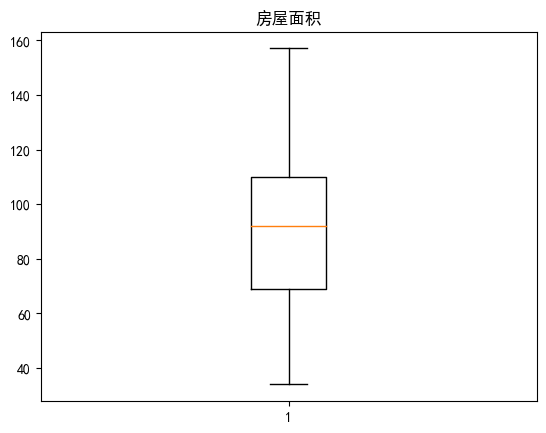

In [166]:
plt.boxplot(df['floor_area_sqm'])
plt.title('房屋面积')
plt.show()

## 属性

在数据分析中，属性/特征的类型主要分为以下几种：

- 定性属性Qualitative
    - 名义属性Nominal：仅用于标记类别，没有内在顺序。如：国籍、颜色、性别
    - 序数属性Ordinal：具有顺序或等级，但是差异不固定。如：学历、满意度
- 定量属性Quantitative
    - 间隔属性Interval：数值间有固定的间隔，但是没有零点。如：温度（0℃不代表没有温度、20℃也不是10℃的两倍）
    - 比例属性Ratio：数值间有固定的间隔，具有真正的零点，而且通过比例进行比较。如：收入、年龄、身高

## 标准化Normalization

标准化/归一化用于对数据属性进行缩放，使其落在较小的范围之内，比如$ [-1, 1] $或$ [0, 1] $。很多机器学习算法都受益于此。

不同尺度的数据会导致一个重要属性的有效性被稀释，因为范围大的属性在模型中更有优先级，这会导致模型表现不佳。

### Min-Max

$$
x = {x - x_{min} \over x_{max} - x_{min}}
$$

In [149]:
df = pd.read_csv('data/students.csv')
df

,Height,Weight,Score
0,187.64,101.48,84
1,174.00,94.35,94
2,179.79,90.67,52
3,192.41,98.10,74
4,188.68,89.90,64
5,160.23,70.21,77
6,179.50,88.01,65
7,168.49,85.02,84
8,168.97,90.64,68
9,174.11,93.06,76


In [150]:
def min_max_normalize(data):
    min_data = data.min(axis=0)
    max_data = data.max(axis=0)
    return (data - min_data) / (max_data - min_data)

In [151]:
min_max_normalize(df[['Height', 'Weight']])

,Height,Weight
0,0.851771,1.000000
1,0.427906,0.771986
2,0.607831,0.654301
3,1.000000,0.891909
4,0.884089,0.629677
5,0.000000,0.000000
6,0.598819,0.569236
7,0.256681,0.473617
8,0.271597,0.653342
9,0.431324,0.730732


In [152]:
from sklearn.preprocessing import MinMaxScaler

In [153]:
df = pd.read_csv('data/students.csv')
df

,Height,Weight,Score
0,187.64,101.48,84
1,174.00,94.35,94
2,179.79,90.67,52
3,192.41,98.10,74
4,188.68,89.90,64
5,160.23,70.21,77
6,179.50,88.01,65
7,168.49,85.02,84
8,168.97,90.64,68
9,174.11,93.06,76


In [154]:
min_max_scaler = MinMaxScaler()
df[['Height', 'Weight']] = min_max_scaler.fit_transform(df[['Height', 'Weight']])
df

,Height,Weight,Score
0,0.851771,1.000000,84
1,0.427906,0.771986,94
2,0.607831,0.654301,52
3,1.000000,0.891909,74
4,0.884089,0.629677,64
5,0.000000,0.000000,77
6,0.598819,0.569236,65
7,0.256681,0.473617,84
8,0.271597,0.653342,68
9,0.431324,0.730732,76


### z-score

$$
x = {x - \mu \over \sigma}
$$

$ \mu $为均值，$ \sigma $为标准差

In [155]:
df = pd.read_csv('data/students.csv')
df

,Height,Weight,Score
0,187.64,101.48,84
1,174.00,94.35,94
2,179.79,90.67,52
3,192.41,98.10,74
4,188.68,89.90,64
5,160.23,70.21,77
6,179.50,88.01,65
7,168.49,85.02,84
8,168.97,90.64,68
9,174.11,93.06,76


In [156]:
def z_score_normalize(data):
    mean_data = data.mean(axis=0)
    std_data = data.std(axis=0)
    return (data - mean_data) / std_data

In [157]:
z_score_normalize(df[['Height', 'Weight']])

,Height,Weight
0,1.006331,1.337249
1,-0.331781,0.496160
2,0.236230,0.062049
3,1.474278,0.938528
4,1.108357,-0.028783
5,-1.682646,-2.351510
6,0.207780,-0.251737
7,-0.872323,-0.604451
8,-0.825234,0.058511
9,-0.320990,0.343985


In [158]:
from sklearn.preprocessing import StandardScaler

In [159]:
df = pd.read_csv('data/students.csv')
df

,Height,Weight,Score
0,187.64,101.48,84
1,174.00,94.35,94
2,179.79,90.67,52
3,192.41,98.10,74
4,188.68,89.90,64
5,160.23,70.21,77
6,179.50,88.01,65
7,168.49,85.02,84
8,168.97,90.64,68
9,174.11,93.06,76


In [160]:
z_score_scaler = StandardScaler()
df[['Height', 'Weight']] = z_score_scaler.fit_transform(df[['Height', 'Weight']])
df

,Height,Weight,Score
0,1.060766,1.409584,84
1,-0.349728,0.522998,94
2,0.249008,0.065406,52
3,1.554025,0.989295,74
4,1.168311,-0.030340,64
5,-1.773665,-2.478709,77
6,0.219019,-0.265354,65
7,-0.919510,-0.637148,84
8,-0.869873,0.061676,68
9,-0.338353,0.362592,76


## 编码Encoding

### 特征工程

从现有数据中创建新的特征，以提高模型的预测能力。

比如，从日期时间数据中提取出年份、月份、星期几等。

In [161]:
df = pd.read_csv('data/houses.csv')
df.head()

,rent_date,flat_type,floor_area_sqm,furnished,latitude,longitude,monthly_rent
0,2021-09,3 room,67.0,yes,1.344518,103.738630,1600
1,2022-05,4-room,92.0,yes,1.330186,103.938717,2250
2,2022-10,3-room,67.0,yes,1.332242,103.845643,1900
3,2022-11,3-room,68.0,yes,1.320502,103.863341,2100
4,2021-01,5 room,110.0,yes,1.388997,103.875148,2100


In [ ]:
df.dtypes

In [ ]:
df['日期'] = pd.to_datetime(df['日期'])
df.dtypes

In [ ]:
df['年'] = df['日期'].dt.year
df['月'] = df['日期'].dt.month
df['日'] = df['日期'].dt.month
df.drop('日期', axis=1, inplace=True)

df

### 分类编码

#### 序号编码

序号编码用于当类别具有自然顺序时，如“低”、“中”、“高”，将类别转换为对应的整数值。

In [ ]:
df = pd.read_csv('data/houses.csv')
df

In [ ]:
df.drop(['town', 'block', 'street_name', 'lease_commence_date'], axis=1, inplace=True)
df

In [ ]:
df.drop(['elevation', 'subzone', 'planning_area', 'region'], axis=1, inplace=True)
df

In [ ]:
df = df[df['flat_type'] != 'executive']
df['flat_type'].unique()

In [ ]:
df.to_csv('data/houses.csv', index=False)